In [4]:
import pandas as pd
from textblob import TextBlob

# Load the datasets
data_1 = pd.read_csv('/content/helpdesk_customer_multi_lang_tickets.csv')
data_2 = pd.read_csv('/content/helpdesk_customer_tickets.csv')

# 1. Priority and Language Distribution
priority_dist_1 = data_1['priority'].value_counts()
priority_dist_2 = data_2['priority'].value_counts()

language_dist_1 = data_1['language'].value_counts()
language_dist_2 = data_2['language'].value_counts()

# 2. Top 5 Queues
top_queues_1 = data_1['queue'].value_counts().head(5)
top_queues_2 = data_2['queue'].value_counts().head(5)

# 3. Null Value Count
null_counts_1 = data_1.isnull().sum()
null_counts_2 = data_2.isnull().sum()

# 4. Sentiment Analysis on Subject
def analyze_sentiment(subjects):
    return subjects.dropna().apply(lambda text: TextBlob(str(text)).sentiment.polarity).mean()

subject_sentiment_1 = analyze_sentiment(data_1['subject'])
subject_sentiment_2 = analyze_sentiment(data_2['subject'])

# Print results
print("Priority Distribution (Dataset 1):\n", priority_dist_1)
print("Priority Distribution (Dataset 2):\n", priority_dist_2)

print("\nLanguage Distribution (Dataset 1):\n", language_dist_1)
print("Language Distribution (Dataset 2):\n", language_dist_2)

print("\nTop 5 Queues (Dataset 1):\n", top_queues_1)
print("Top 5 Queues (Dataset 2):\n", top_queues_2)

print("\nNull Value Counts (Dataset 1):\n", null_counts_1)
print("Null Value Counts (Dataset 2):\n", null_counts_2)

print("\nAverage Subject Sentiment (Dataset 1):", subject_sentiment_1)
print("Average Subject Sentiment (Dataset 2):", subject_sentiment_2)


Priority Distribution (Dataset 1):
 priority
high      788
medium    572
low       206
Name: count, dtype: int64
Priority Distribution (Dataset 2):
 priority
high      266
medium    205
low       129
Name: count, dtype: int64

Language Distribution (Dataset 1):
 language
de    397
es    379
en    339
pt    229
fr    222
Name: count, dtype: int64
Language Distribution (Dataset 2):
 language
en    163
de    152
es    133
pt     81
fr     71
Name: count, dtype: int64

Top 5 Queues (Dataset 1):
 queue
Technical Support       589
Product Support         288
Customer Service        234
IT Support              179
Billing and Payments    117
Name: count, dtype: int64
Top 5 Queues (Dataset 2):
 queue
Technical Support       210
Product Support          93
Customer Service         85
IT Support               77
Billing and Payments     46
Name: count, dtype: int64

Null Value Counts (Dataset 1):
 id                  0
subject             1
body                1
answer              0
type       

# New section

In [3]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1566 entries, 0 to 1565
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1566 non-null   int64  
 1   subject        1565 non-null   object 
 2   body           1565 non-null   object 
 3   answer         1566 non-null   object 
 4   type           1566 non-null   object 
 5   queue          1566 non-null   object 
 6   priority       1566 non-null   object 
 7   language       1566 non-null   object 
 8   business_type  1566 non-null   object 
 9   tag_1          1566 non-null   object 
 10  tag_2          1566 non-null   object 
 11  tag_3          1566 non-null   object 
 12  tag_4          1566 non-null   object 
 13  tag_5          1419 non-null   object 
 14  tag_6          1011 non-null   object 
 15  tag_7          489 non-null    object 
 16  tag_8          137 non-null    object 
 17  tag_9          0 non-null      float64
dtypes: float

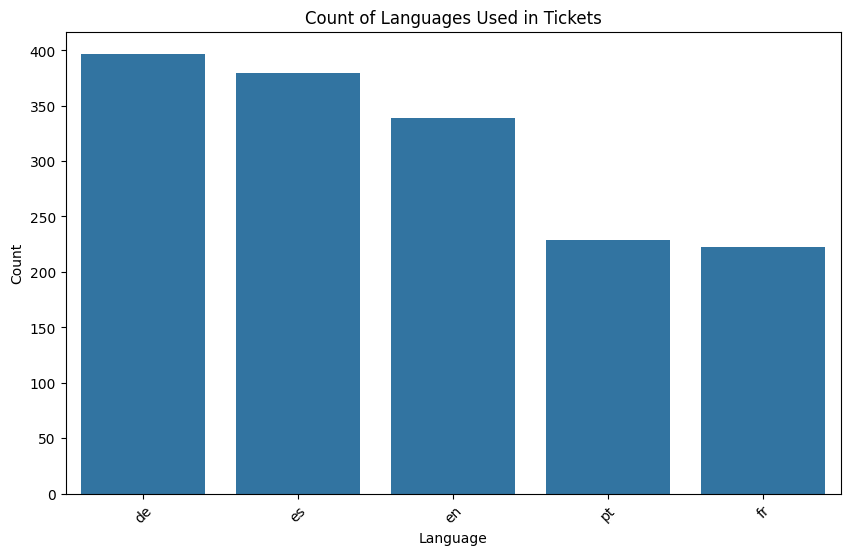

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
language_counts = data_1['language'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=language_counts.index, y=language_counts.values)
plt.title('Count of Languages Used in Tickets')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()